In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DateType,DecimalType
from pyspark.sql.functions import col,sum,avg,when
from pyspark.sql.window import Window

In [0]:
# Define the schema
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])


In [0]:
ball_by_ball_df = spark.read.csv('dbfs:/FileStore/ipl_till_2017/ball_by_ball.csv', header=True, schema=ball_by_ball_schema)

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df = spark.read.schema(match_schema).format('csv').option('header','true').load('dbfs:/FileStore/ipl_till_2017/match.csv')

In [0]:
players_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
players_df = spark.read.schema(players_schema).format('csv').option('header','true').load('dbfs:/FileStore/ipl_till_2017/player.csv')

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(18, 0), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
player_match_df = spark.read.schema(player_match_schema).format('csv').option('header','true').load('dbfs:/FileStore/ipl_till_2017/player_match.csv')

In [0]:
team_schema = StructType([
    StructField('team_sk',IntegerType(),True)
    ,StructField('team_id',IntegerType(),True)
    ,StructField('team_name',StringType(),True)
])

In [0]:
team_df = spark.read.format('csv').schema(team_schema).option('header','true').load('dbfs:/FileStore/ipl_till_2017/team.csv')

In [0]:
#filter the balls with no wides and no_balls
ball_by_ball_df = ball_by_ball_df.filter((col('wides')==0) & (col('noballs')==0))

In [0]:
#Total run and avg run by each match and innings
total_avg_run_df = ball_by_ball_df.groupBy('match_id', 'innings_no').agg(
    sum('runs_scored').alias('total_runs'),
    avg('runs_scored').alias('avg_runs')
)

In [0]:
#windows function: calculate running total runs in each match in each over
Windows_spec = Window.partitionBy('match_id', 'innings_no').orderBy('over_id')

ball_by_ball_df = ball_by_ball_df.withColumn(
    'running_total_runs',
    sum('runs_scored').over(Windows_spec)
)

In [0]:
#conditional columns: create flag column based on either more than 6 including extras or take wicket
ball_by_ball_df = ball_by_ball_df.withColumn(
    'high_impact',
    when((col('runs_scored') + col('extra_runs')> 6) | (col('bowler_wicket') == True),True).otherwise(False)
    )

In [0]:
from pyspark.sql.functions import year,month,dayofmonth,when

#extract year,month,day from match_date column
match_df = match_df.withColumn("year",year('match_date')) \
                    .withColumn("month",month('match_date')) \
                    .withColumn("day",dayofmonth('match_date'))

#display when win_margin is more than 100 then high , 100-50 medium and < 50 low 
match_df = match_df.withColumn(
    'win_margin_category',
    when(col('win_margin') >= 100, 'High')
    .when((col('win_margin') <100) & (col('win_margin') > 50), 'medium')
    .otherwise('low')
)

# Analyaze impact of match on toss win or loss
match_df = match_df.withColumn(
    'toss_match_win',
    when(col('toss_winner') == col('match_winner'), 'Yes')
    .otherwise('No')
)

In [0]:
from pyspark.sql.functions import lower,regexp_replace

#remove unwanted characters form players_name using lower and regexp_replace
players_df = players_df.withColumn('player_name', lower(regexp_replace('player_name',"[^a-zA-Z0-9\\s]",''))) \
                        .withColumn('bowling_skill', regexp_replace('bowling_skill',"[^a-zA-Z0-9\\s]",'')) \
                        .withColumn('batting_hand', regexp_replace('batting_hand','[^a-zA-Z0-9\\s]',''))

#Handling missing value for  default batting hand and bowling skill with unknown
players_df = players_df.na.fill({'batting_hand':'unknown','bowling_skill':'unknown'})

#catgegories with players with batting hand
players_df = players_df.withColumn(
    'batting_style',
    when(col('batting_hand') ==  'Left-hand bat','Left handed')
    .otherwise('Right handed')
)

#display(players_df)

In [0]:
from pyspark.sql.functions import col,when,current_date

#Add a Vetran_status column based on players age
player_match_df = player_match_df.withColumn(
    'vetran_status',
    when(col('age_as_on_match') >= 35, 'Vetran')
    .otherwise('non-vetran')
) 

#Dynamic age calute since they joined
player_match_df = player_match_df.withColumn(
    'years_since_debut',
    (year(current_date()) - col('season_year'))
)

player_match_df = player_match_df.na.fill({'bowling_status':'unknown','batting_status':'unknown','player_captain':'unknown'})

display(player_match_df)

player_match_sk playermatch_key match_id player_id player_name dob batting_hand bowling_skill country_name role_desc player_team opposit_team season_year is_manofthematch age_as_on_match isplayers_team_won batting_status bowling_status player_captain opposit_captain player_keeper opposit_keeper vetran_status years_since_debut -1 -1 -1 -1 N/A null null null null null null null null null null null unknown unknown unknown null null null non-vetran null 12694 33598700006 335987 6 R Dravid 1973-01-11 Right-hand bat Right-arm offbreak India Captain Royal Challengers Bangalore Kolkata Knight Riders 2008 false 35 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha Vetran 16 12695 33598700007 335987 7 W Jaffer 1978-02-16 Right-hand bat Right-arm offbreak India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 30 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12696 33598700008 335987 8 V Kohli 1988-11-05 Right-hand bat Right-arm medium India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 20 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12697 33598700009 335987 9 JH Kallis 1975-10-16 Right-hand bat Right-arm fast-medium South Africa Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 33 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12698 33598700010 335987 10 CL White 1983-08-18 Right-hand bat Legbreak googly Australia Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 25 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12699 33598700011 335987 11 MV Boucher 1976-12-03 Right-hand bat Right-arm medium South Africa Keeper Royal Challengers Bangalore Kolkata Knight Riders 2008 false 32 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12700 33598700012 335987 12 B Akhil 1977-10-07 Right-hand bat Right-arm medium-fast India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 31 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12701 33598700013 335987 13 AA Noffke 1977-04-30 Right-hand bat Right-arm fast-medium Australia Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 31 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12702 33598700014 335987 14 P Kumar 1986-10-02 Right-hand bat Right-arm medium India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 22 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12703 33598700015 335987 15 Z Khan 1978-10-07 Right-hand bat Left-arm fast-medium India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 30 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha non-vetran 16 12704 33598700016 335987 16 SB Joshi 1970-06-06 Left-hand bat Slow left-arm orthodox India Player Royal Challengers Bangalore Kolkata Knight Riders 2008 false 38 false unknown unknown R Dravid SC Ganguly MV Boucher WP Saha Vetran 16 12705 33598700001 335987 1 SC Ganguly 1972-07-08 Left-hand bat Right-arm medium India Captain Kolkata Knight Riders Royal Challengers Bangalore 2008 false 36 true unknown unknown SC Ganguly R Dravid WP Saha MV Boucher Vetran 16 12706 33598700002 335987 2 BB McCullum 1981-09-27 Right-hand bat Right-arm medium New Zealand Player Kolkata Knight Riders Royal Challengers Bangalore 2008 true 27 true unknown unknown SC Ganguly R Dravid WP Saha MV Boucher non-vetran 16 12707 33598700003 335987 3 RT Ponting 1974-12-19 Right-hand bat Right-arm medium Australia Player Kolkata Knight Riders Royal Challengers Bangalore 2008 false 34 true unknown unknown SC Ganguly R Dravid WP Saha MV Boucher non-vetran 16 12708 33598700004 335987 4 DJ Hussey 1977-07-15 Right-hand bat Right-arm offbreak Australia Player Kolkata Knight Riders Royal Challengers Bangalore 2008 false 31 true unknown unknown SC Ganguly R Dravid WP Saha MV Boucher non-vetran 16 12709 33598700005 

In [0]:
ball_by_ball_df.createOrReplaceTempView('ball_by_ball')
match_df.createOrReplaceTempView('match')
players_df.createOrReplaceTempView('player')
player_match_df.createOrReplaceTempView('player_match')
team_df.createOrReplaceTempView('team')

In [0]:
top_scoring_batsman_per_season = spark.sql("""
    SELECT 
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs 
    FROM ball_by_ball b
        JOIN match m ON b.match_id = m.match_id   
        JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
        JOIN player p ON p.player_id = pm.player_id
    GROUP BY p.player_name, m.season_year
    ORDER BY m.season_year, total_runs DESC    
""")

In [0]:
display(top_scoring_batsman_per_season)

player_name season_year total_runs se marsh 2008 614 g gambhir 2008 532 st jayasuriya 2008 508 sr watson 2008 463 gc smith 2008 437 ac gilchrist 2008 431 yk pathan 2008 430 sk raina 2008 420 ms dhoni 2008 414 v sehwag 2008 399 rg sharma 2008 399 r dravid 2008 370 sc ganguly 2008 349 s dhawan 2008 340 kc sangakkara 2008 319 dj hussey 2008 318 rv uthappa 2008 316 sa asnodkar 2008 311 yuvraj singh 2008 299 pa patel 2008 297 y venugopal rao 2008 283 ja morkel 2008 235 mv boucher 2008 225 jr hopes 2008 221 am nayar 2008 205 jh kallis 2008 199 salman butt 2008 192 sp fleming 2008 192 s badrinath 2008 192 sr tendulkar 2008 188 bb mccullum 2008 188 dpmd jayawardene 2008 179 ml hayden 2008 179 m kaif 2008 176 dj bravo 2008 175 mek hussey 2008 168 hh gibbs 2008 167 v kohli 2008 165 a symonds 2008 161 wp saha 2008 159 lr shukla 2008 157 vvs laxman 2008 155 la pomersbach 2008 152 lrpl taylor 2008 149 sm pollock 2008 147 kd karthik 2008 145 s vidyut 2008 145 ra jadeja 2008 134 ik pathan 2008 130 mf maharoof 2008 125 kamran akmal 2008 124 misbahulhaq 2008 117 w jaffer 2008 115 sb styris 2008 112 p kumar 2008 112 cl white 2008 109 db ravi teja 2008 108 mk tiwary 2008 104 db das 2008 103 nk patel 2008 103 tm dilshan 2008 102 ab de villiers 2008 95 sm katich 2008 95 pp chawla 2008 89 sp goswami 2008 82 shahid afridi 2008 81 k goel 2008 76 rr sarwan 2008 73 sk warne 2008 69 yv takawale 2008 69 mohammad hafeez 2008 64 ab agarkar 2008 54 shoaib malik 2008 51 ut yadav 2008 49 sb bangar 2008 47 b akhil 2008 46 dr smith 2008 45 a chopra 2008 42 lpc silva 2008 40 dj thornely 2008 39 rt ponting 2008 39 umar gul 2008 39 a mishra 2008 37 sohail tanvir 2008 35 ms gony 2008 35 r bhatia 2008 34 l ronchi 2008 34 m rawat 2008 34 d salunkhe 2008 33 z khan 2008 33 pr shah 2008 32 t taibu 2008 31 harbhajan singh 2008 30 m kartik 2008 30 rr powar 2008 28 rp singh 2008 27 ss tiwary 2008 26 wa mota 2008 26 s chanderpaul 2008 25 r vinay kumar 2008 25 ma khote 2008 24 j arunkumar 2008 23 b chipli 2008 20 jdp oram 2008 18 ds lehmann 2008 18 b lee 2008 17 joginder sharma 2008 16 ck kapugedera 2008 16 vy mahesh 2008 15 wpujc vaas 2008 15 a kumble 2008 13 dt patil 2008 13 sd chitnis 2008 12 bj hodge 2008 12 dnt zoysa 2008 11 m ntini 2008 11 i sharma 2008 11 t kohli 2008 10 aa noffke 2008 9 ad mascarenhas 2008 9 rr raje 2008 8 tm srivastava 2008 8 sb joshi 2008 6 pankaj singh 2008 5 sk trivedi 2008 5 gd mcgrath 2008 4 am rahane 2008 4 vrv singh 2008 4 s sohal 2008 4 mk pandey 2008 3 mohammad asif 2008 3 d kalyankrishna 2008 3 younis khan 2008 3 pj sangwan 2008 2 ds kulkarni 2008 2 crd fernando 2008 2 h das 2008 2 pp ojha 2008 2 a nehra 2008 2 vs yeligati 2008 2 ab dinda 2008 2 dw steyn 2008 2 shoaib akhtar 2008 2 dp vijaykumar 2008 1 pm sarvesh kumar 2008 1 s anirudha 2008 1 iqbal abdulla 2008 1 a mukund 2008 0 s sreesanth 2008 0 u kaul 2008 0 l balaji 2008 0 m muralitharan 2008 0 abdur razzak 2008 0 mm patel 2008 0 ml hayden 2009 571 ac gilchrist 2009 486 ab de villiers 2009 459 sk raina 2009 433 tm dilshan 2009 414 jp duminy 2009 372 hh gibbs 2009 371 bj hodge 2009 365 sr tendulkar 2009 363 jh kallis 2009 360 rg sharma 2009 354 yuvraj singh 2009 340 ms dhoni 2009 332 kc sangakkara 2009 332 ra jadeja 2009 293 kd karthik 2009 288 g gambhir 2009 284 bb mccullum 2009 278 lrpl taylor 2009 274 r dravid 2009 271 yk pathan 2009 261 a symonds 2009 248 v kohli 2009 246 tl suman 2009 237 st jayasuriya 2009 219 dpmd jayawardene 2009 219 dj bravo 2009 217 dr smith 2009 215 gc smith 2009 208 ik pathan 2009 196 v sehwag 2009 195 am nayar 2009 191 ch gayle 2009 184 sc ganguly 2009 183 s badrinath 2009 177 rv uthappa 2009 175 nv ojha 2009 168 mk pandey 2009 167 mn van wyk 2009 163 da warner 2009 163 am rahane 2009 143 mv boucher 2009 143 pa patel 2009 142 sm katich 2009 141 rs bopara 2009 138 y venugopal rao 2009 124 k goel 2009 124 re van der merwe 2009 122 s sohal 2009 115 sk warne 2009 108 rj quiney 2009 103 sa asnodkar 2009 98 ja morkel 2009 97 dj hussey 2009 93 kp pietersen 2009 9

In [0]:
economical_bowlers_powerplay = spark.sql("""
        SELECT 
            p.player_name, 
            AVG(b.runs_scored) AS avg_runs_per_ball, 
            COUNT(b.bowler_wicket) AS total_wickets
        FROM ball_by_ball b
            JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
            JOIN player p ON pm.player_id = p.player_id
        WHERE b.over_id <= 6
            GROUP BY p.player_name
            HAVING COUNT(*) >= 1
        ORDER BY avg_runs_per_ball, total_wickets DESC
""")

economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|           18|
|     avesh khan|               0.5|           12|
|       aj finch|               0.5|            6|
|     ankit soni|               0.5|            6|
|      gr napier|               0.5|            6|
|        a zampa|               0.5|            6|
|       nb singh|0.5833333333333334|           24|
|     ag murtaza|0.6538461538461539|           78|
|      sb bangar|0.6666666666666666|           18|
|     d du preez|0.6666666666666666|           18|
|        s gopal|0.6666666666666666|            6|
|     fh edwards|0.6923076923076923|           78|
|       a kumble|0.7685185185185185|          108|
|       umar gul|0.7777777777777778|           36|
|   kp pietersen|0.7777777777777778|           18|
|j syed mohammad|0.7777777777777778|           18|
|    rj peterson|0.833333333333

In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")


display(toss_impact_individual_matches)

match_id toss_winner toss_name match_winner match_outcome 335987 Royal Challengers Bangalore field Kolkata Knight Riders Lost 335988 Chennai Super Kings bat Chennai Super Kings Won 335989 Rajasthan Royals bat Delhi Daredevils Lost 335990 Mumbai Indians bat Royal Challengers Bangalore Lost 335991 Deccan Chargers bat Kolkata Knight Riders Lost 335992 Kings XI Punjab bat Rajasthan Royals Lost 335993 Deccan Chargers bat Delhi Daredevils Lost 335994 Mumbai Indians field Chennai Super Kings Lost 335995 Rajasthan Royals field Rajasthan Royals Won 335996 Mumbai Indians field Kings XI Punjab Lost 335997 Rajasthan Royals field Rajasthan Royals Won 335998 Kolkata Knight Riders bat Chennai Super Kings Lost 335999 Deccan Chargers field Deccan Chargers Won 336000 Delhi Daredevils bat Kings XI Punjab Lost 336001 Chennai Super Kings bat Chennai Super Kings Won 336002 Kolkata Knight Riders bat Mumbai Indians Lost 336003 Royal Challengers Bangalore field Delhi Daredevils Lost 336004 Kings XI Punjab field Kings XI Punjab Won 336005 Rajasthan Royals bat Rajasthan Royals Won 336006 Chennai Super Kings bat Delhi Daredevils Lost 336007 Deccan Chargers bat Royal Challengers Bangalore Lost 336008 Kings XI Punjab bat Kings XI Punjab Won 336009 Delhi Daredevils field Mumbai Indians Lost 336010 Chennai Super Kings bat Rajasthan Royals Lost 336011 Kings XI Punjab field Kings XI Punjab Won 336012 Deccan Chargers field Deccan Chargers Won 336013 Mumbai Indians field Mumbai Indians Won 336014 Chennai Super Kings field Chennai Super Kings Won 336015 Kolkata Knight Riders bat Kolkata Knight Riders Won 336016 Rajasthan Royals field Rajasthan Royals Won 336017 Mumbai Indians field Mumbai Indians Won 336018 Kings XI Punjab field Chennai Super Kings Lost 336019 Kolkata Knight Riders bat Kolkata Knight Riders Won 336020 Rajasthan Royals field Rajasthan Royals Won 336021 Royal Challengers Bangalore bat Kings XI Punjab Lost 336022 Kolkata Knight Riders bat Kolkata Knight Riders Won 336023 Mumbai Indians field Mumbai Indians Won 336024 Rajasthan Royals field Kings XI Punjab Lost 336025 Deccan Chargers field Delhi Daredevils Lost 336026 Mumbai Indians field Mumbai Indians Won 336027 Delhi Daredevils bat Kings XI Punjab Lost 336028 Royal Challengers Bangalore field Rajasthan Royals Lost 336029 Deccan Chargers field Mumbai Indians Lost 336030 Kolkata Knight Riders bat Chennai Super Kings Lost 336031 Delhi Daredevils field Delhi Daredevils Won 336032 Rajasthan Royals field Rajasthan Royals Won 336033 Mumbai Indians field Kings XI Punjab Lost 336034 Royal Challengers Bangalore bat Royal Challengers Bangalore Won 336036 Kings XI Punjab field Kings XI Punjab Won 336037 Delhi Daredevils field Delhi Daredevils Won 336038 Rajasthan Royals bat Rajasthan Royals Won 336039 Deccan Chargers field Royal Challengers Bangalore Lost 336040 Kings XI Punjab bat Kolkata Knight Riders Lost 336041 Rajasthan Royals field Rajasthan Royals Won 336042 Deccan Chargers bat Chennai Super Kings Lost 336043 Delhi Daredevils field Rajasthan Royals Lost 336044 Kings XI Punjab bat Chennai Super Kings Lost 336045 Rajasthan Royals field Rajasthan Royals Won 392186 Chennai Super Kings field Mumbai Indians Lost 392187 Royal Challengers Bangalore bat Royal Challengers Bangalore Won 392188 Delhi Daredevils field Delhi Daredevils Won 392189 Kolkata Knight Riders bat Deccan Chargers Lost 392190 Chennai Super Kings bat Chennai Super Kings Won 392191 Kolkata Knight Riders field Kolkata Knight Riders Won 392193 Deccan Chargers bat Deccan Chargers Won 392194 Delhi Daredevils bat Delhi Daredevils Won 392195 Kolkata Knight Riders field Rajasthan Royals Lost 392196 Royal Challengers Bangalore bat Kings XI Punjab Lost 392197 Deccan Chargers bat Deccan Chargers Won 392199 Royal Challengers Bangalore bat Delhi Daredevils Lost 392200 Kings XI Punjab bat Kings XI Punjab Won 392201 Deccan Chargers field Deccan Chargers Won 392202 Mumbai Indians bat Mumbai Indians Won 392203 Delhi Daredevils bat Rajasthan Royals Lost 392204 

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")

average_runs_in_wins.show()

+--------------+-------------------+--------------+
|   player_name|   avg_runs_in_wins|innings_played|
+--------------+-------------------+--------------+
|    kp appanna|                0.0|             1|
|      i sharma|                0.0|             1|
|     jj bumrah|                0.0|             2|
|      j theron|                0.0|             1|
|      ts mills|                0.0|             3|
|       a nehra|                0.0|             2|
|      vr aaron|                0.0|             5|
|     sn thakur|                0.0|             2|
| anirudh singh|                0.0|             1|
|    t thushara|                0.2|             5|
|     sa abbott|               0.25|             4|
| yashpal singh| 0.3157894736842105|            19|
|   kc cariappa| 0.3333333333333333|             3|
|   s sreesanth| 0.3333333333333333|             3|
|    jd unadkat|                0.4|             5|
|    sm harwood|0.42857142857142855|             7|
|sandeep sha

In [0]:
import matplotlib.pyplot as plt

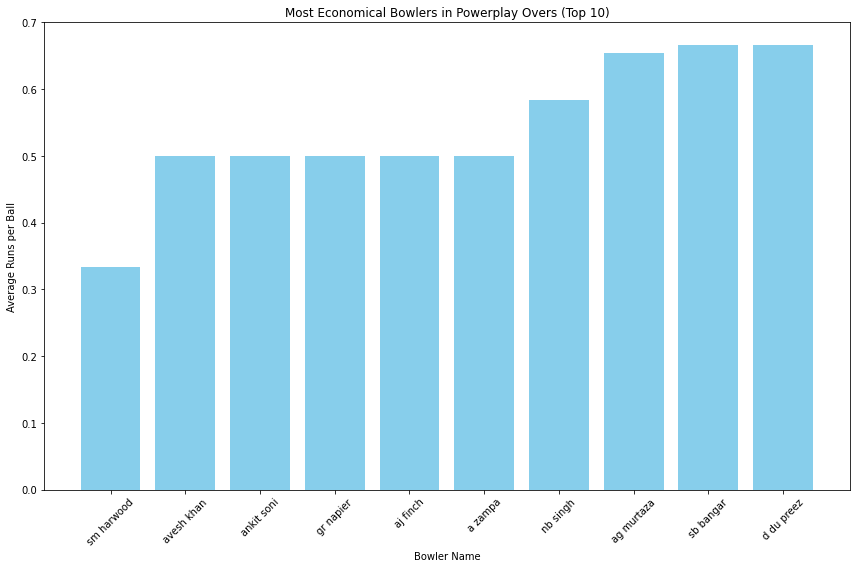

In [0]:
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:

import seaborn as sns

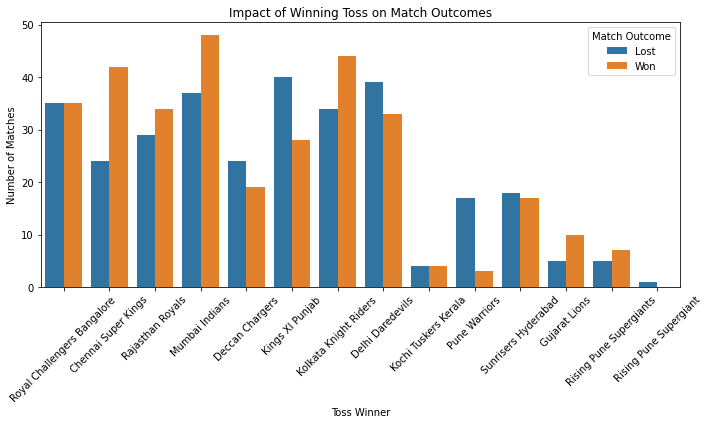

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

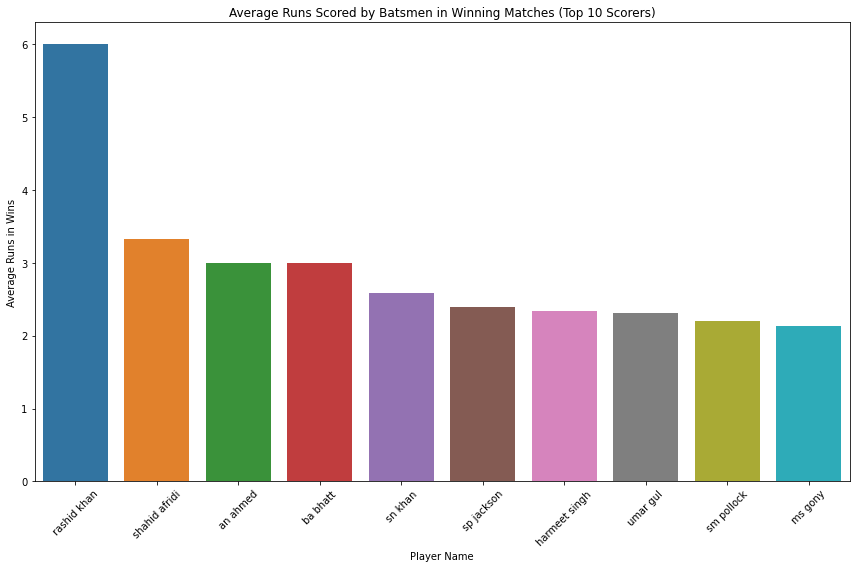

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")


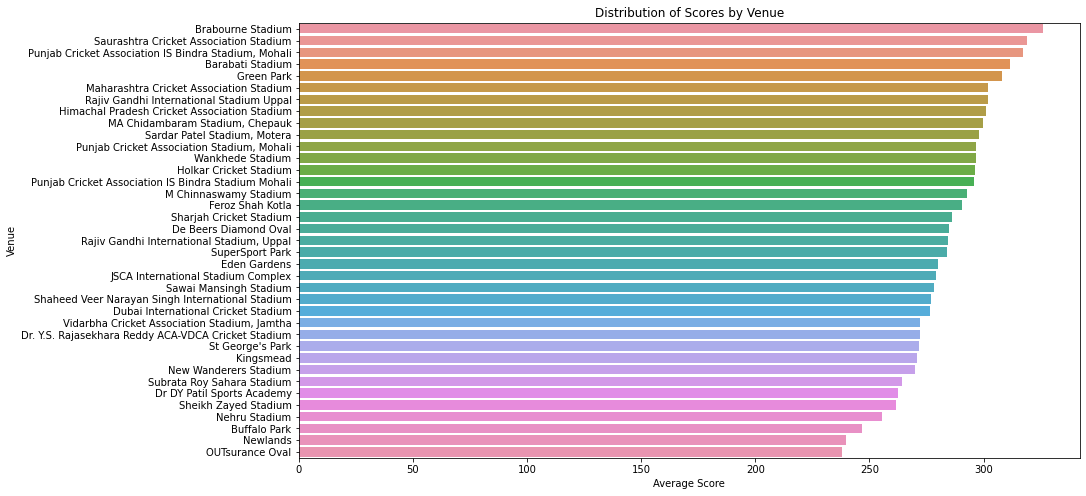

In [0]:
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")


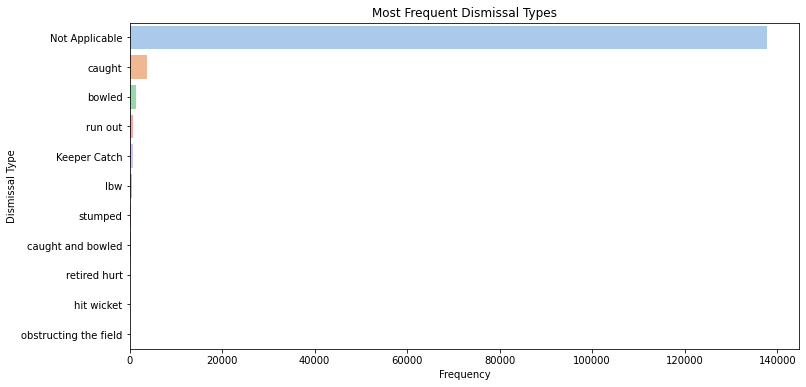

In [0]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()
     

In [0]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


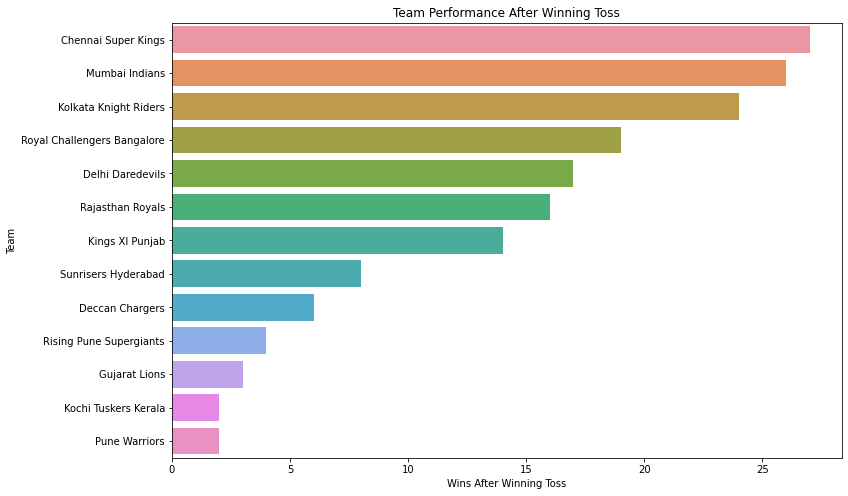

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()


In [0]:
%sh
git config --global user.name "SurajBoity"
git config --global user.email "surajkumar.boity@gmail.com"

In [0]:
%sh
git clone https://github.com/SurajBoity/Databricks.git /Users/surajkumarboity@gmail.com/IPL/IPL

Cloning into '/Users/surajkumarboity@gmail.com/IPL/IPL'...


In [0]:
%sh
cd /Users/surajkumarboity@gmail.com/IPL/IPL
ls
pwd
git commit -m "hi"

README.md
surajkumarboity@gmail.com.zip
/Users/surajkumarboity@gmail.com/IPL/IPL
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [0]:
%sh
cd /Users/surajkumarboity@gmail.com/IPL/IPL
#mkdir IPL
#cd IPL
pwd
#echo hii i am toufeeq > dursj.txt
ls

#git add IPL
git status --short

#git commit -m "commit"

git push origin main

/Users/surajkumarboity@gmail.com/IPL/IPL
IPL
README.md
surajkumarboity@gmail.com.zip
fatal: could not read Username for 'https://github.com': No such device or address
